# 因子投资视角

## 一、Capital Asset Pricing Model (CAPM)

$$E(R_i) = R_f + \beta_i \times (E(R_m) - R_f)$$

其中，$E(R_i)$ 表示投资资产 $i$ 的预期回报率，$R_f$ 表示无风险资产的预期回报率，$E(R_m)$ 表示市场整体的预期回报率，$\beta_i$ 表示投资资产 $i$ 相对于市场整体风险的度量，也被称为资产 $i$ 的 beta 值。

### 1.1 $\beta_i$ 含义为何？

在 CAPM 模型中，$\beta_i$ 是投资资产 $i$ 相对于市场整体风险的度量，也被称为资产 $i$ 的 beta 值。

为了计算 $\beta_i$，需要首先计算投资资产 $i$ 与市场整体的协方差，然后再将其除以市场整体的方差。具体来说，可以使用以下公式计算：

$$\beta_i = \frac{cov(R_i, R_m)}{var(R_m)}$$

其中，$cov(R_i, R_m)$ 表示投资资产 $i$ 和市场整体的收益率之间的协方差，$var(R_m)$ 表示市场整体的收益率方差。$\beta_i$ 的计算结果表示，资产 $i$ 的收益率相对于市场整体收益率的波动程度。如果 $\beta_i$ 大于 1，则说明资产 $i$ 的收益率波动较市场整体更为剧烈；如果 $\beta_i$ 小于 1，则说明资产 $i$ 的收益率波动较市场整体更为平稳；如果 $\beta_i$ 等于 1，则说明资产 $i$ 的收益率波动与市场整体相当。

需要注意的是，CAPM 模型的假设条件有一定的局限性，例如假设投资者可以无限制地进行多空头操作、市场整体处于完全竞争状态等。因此，CAPM 模型的结果可能受到数据和假设的影响，实际应用时应结合实际情况进行综合考虑。




                            OLS Regression Results                            
Dep. Variable:                   mygf   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.140
Date:                Thu, 02 Mar 2023   Prob (F-statistic):              0.286
Time:                        22:11:10   Log-Likelihood:                 3875.1
No. Observations:                1921   AIC:                            -7746.
Df Residuals:                    1919   BIC:                            -7735.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.001      2.877      0.0

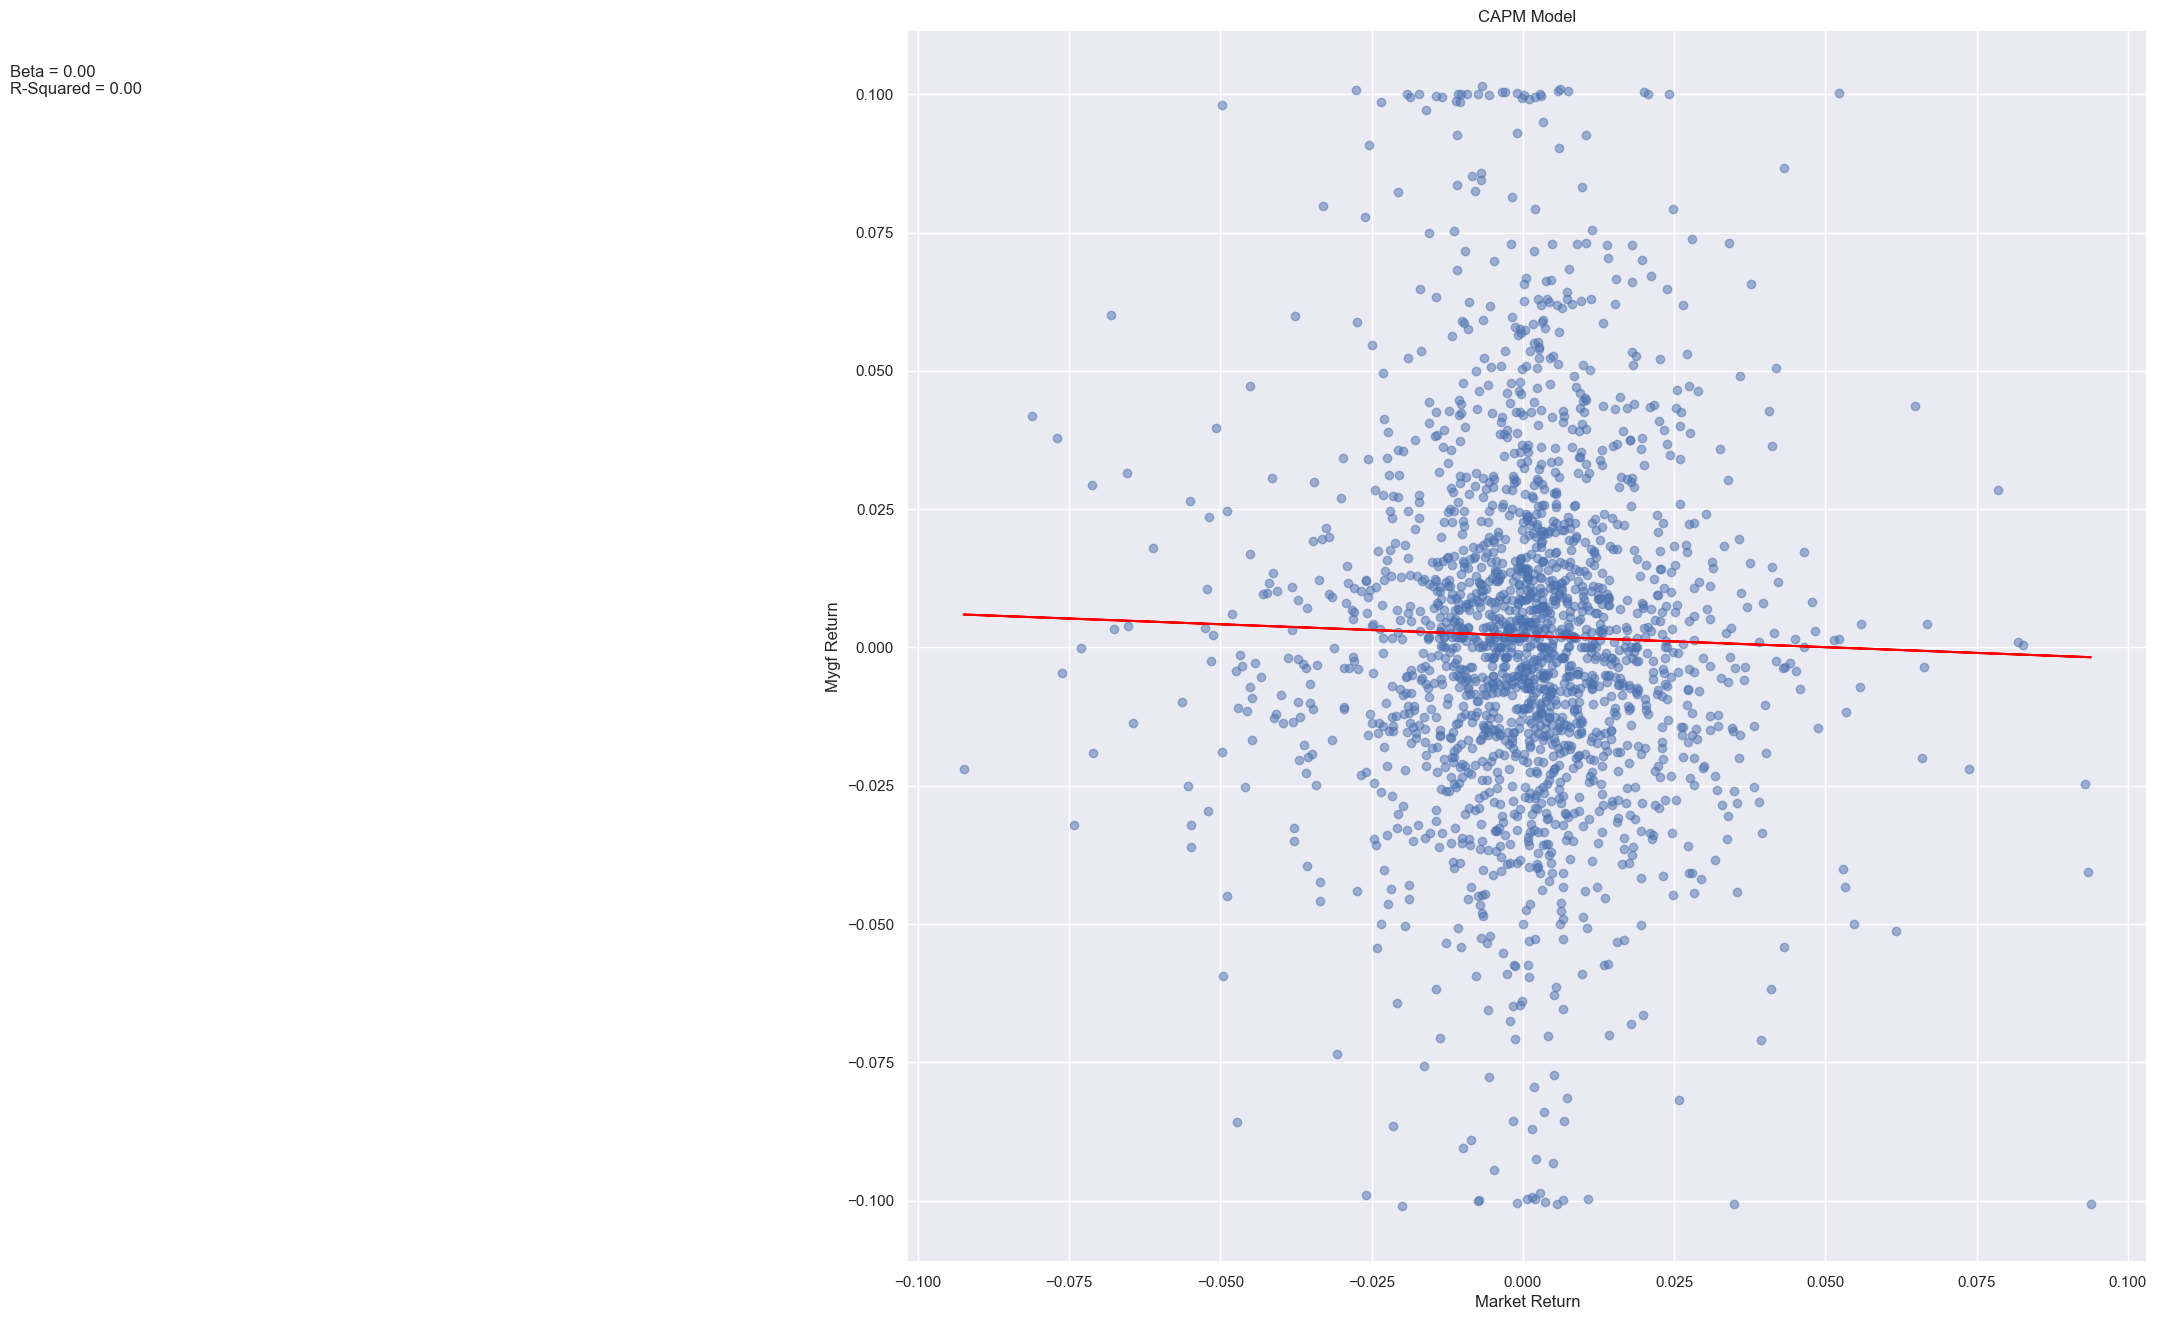

In [16]:
# !pip install akshare
# !pip install statsmodels
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

hs300_df = ak.stock_zh_index_daily("sh000300")
mygf_df = ak.stock_zh_a_daily(symbol="sz002714", start_date="20150101", end_date="20221231", adjust="qfq")

hs300_df["return"] = hs300_df["close"].pct_change()
mygf_df["return"] = mygf_df["close"].pct_change()

data = pd.DataFrame({"hs300": hs300_df["return"], "mygf": mygf_df["return"]}).dropna()
# 用sm做OLS拟合
X = sm.add_constant(data["hs300"])
y = data["mygf"]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
# print(results.params)

rf = 0.03  # 无风险收益率,用现在的国债收益率代替
# 市场整体预期收益率，使用历史数据的平均值
rm = data["hs300"].mean()

beta = results.params[0]
mygf_er = rf + beta * (rm - rf)
print(f"牧原股份的预期收益率为 {mygf_er:.2%}")

# 绘制散点图，alpha点透明度
plt.scatter(data["hs300"], data["mygf"], alpha=0.5)

# 绘制拟合直线
plt.plot(data["hs300"], results.predict(X), color="red")

# 添加标题和轴标签
plt.title("CAPM Model")
plt.xlabel("Market Return")
plt.ylabel("Mygf Return")

# 添加文本框，显示模型参数和R平方
plt.text(-0.25, 0.1, f"Beta = {beta:.2f}\nR-Squared = {results.rsquared:.2f}")

# 显示图形
plt.show()

## 1.2 为何用OLS 拟合
在实际应用中，为了评估资产的 $\beta$ 值，我们需要使用统计方法对历史数据进行分析和拟合。一种常见的方法是使用OLS（Ordinary Least Squares）回归模型，对资产收益率与市场收益率之间的关系进行线性拟合。由于CAPM模型假设资产收益率与市场收益率之间的关系是线性的，因此OLS模型是一个比较适合的工具。

具体来说，我们可以将资产收益率视为因变量 $R_i$，市场收益率视为自变量 $R_m$，然后使用OLS模型来拟合这两个变量之间的线性关系。模型的参数 $\alpha$ 和 $\beta$ 分别表示截距项和自变量的系数，其中 $\beta$ 就是资产的 $\beta$ 值。在使用OLS模型进行拟合时，我们可以通过最小化残差平方和来得到最优的参数估计值，从而得到资产的 $\beta$ 值。

## 1.3 OLS简介
OLS（普通最小二乘法）是一种线性回归分析的方法，用于建立自变量与因变量之间的关系，并通过最小化残差平方和来估计模型参数。

OLS假设自变量与因变量之间存在线性关系，即因变量可以表示为自变量的线性组合加上一个误差项，而这个误差项是随机的，服从正态分布，且具有恒定的方差。OLS的目标是找到一条直线（或者更一般地说是一个超平面），使得所有样本点到这条直线（或者超平面）的距离平方和最小。

OLS的公式可以表示为：

$y_i = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_kx_{ik} + \epsilon_i$

其中，$y_i$是第$i$个样本的因变量，$x_{i1}$到$x_{ik}$是第$i$个样本的$k$个自变量，$\beta_0$到$\beta_k$是模型参数，$\epsilon_i$是第$i$个样本的误差项。

OLS的目标是最小化残差平方和：

$SS_{res} = \sum_{i=1}^n\epsilon_i^2 = \sum_{i=1}^n(y_i - \beta_0 - \beta_1x_{i1} - \beta_2x_{i2} - ... - \beta_kx_{ik})^2$

为了求解最小化残差平方和的解析解，我们对$\beta_0$到$\beta_k$求偏导数，然后令偏导数为零，得到OLS的参数估计式：

$\hat{\beta} = (X'X)^{-1}X'y$

其中，$\hat{\beta}$是参数的估计值，$X$是$n\times(k+1)$的自变量矩阵，其中第一列都是1，$y$是$n\times1$的因变量向量，$X'$表示$X$的转置，$(X'X)^{-1}$是矩阵$X'X$的逆矩阵。

通过OLS求解得到的参数估计值可以用来预测新的样本的因变量值，并进行模型的显著性检验和参数的假设检验等统计分析。

需要注意的是，OLS假设了误差项服从正态分布，且具有恒定的方差。如果误差项不满足这些假设，可能导致OLS的结果不准确或者无效。此外，OLS也存在一些问题，比如多重共线性、异方差性等，需要针对不同问题采取相应的解决方法。

# 二、Arbitrage Pricing Theory (APT)
$R_i = \alpha_i + \beta_{i,1}f_1 + \beta_{i,2}f_2 + \cdots + \beta_{i,k}f_k + \varepsilon_i$

其中，$R_i$表示第$i$个资产的收益率，$\alpha_i$表示资产的无风险收益率或特有收益率，$\beta_{i,j}$表示第$i$个资产在第$j$个因子上的因子暴露值，$f_j$表示第$j$个因子的因子收益率，$\varepsilon_i$表示误差项。

## 2.1 APT的demo
在实际应用中，我们可以使用OLS模型来拟合资产收益率与因子收益率之间的关系，从而得到资产的因子载荷。在这里，我们使用股票和期货数据来演示APT的使用方法。
对冲资产收益率作为自变量，股票收益率作为因变量，使用OLS方法估计回归模型，得到了模型的参数估计和统计量，其中模型的截距项表示无风险收益率，模型的斜率表示股票收益率对对冲资产收益率的敏感度。


                            OLS Regression Results                            
Dep. Variable:                  stock   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.043
Date:                Thu, 02 Mar 2023   Prob (F-statistic):              0.309
Time:                        22:11:10   Log-Likelihood:                 437.21
No. Observations:                 162   AIC:                            -870.4
Df Residuals:                     160   BIC:                            -864.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.001     -0.718      0.4

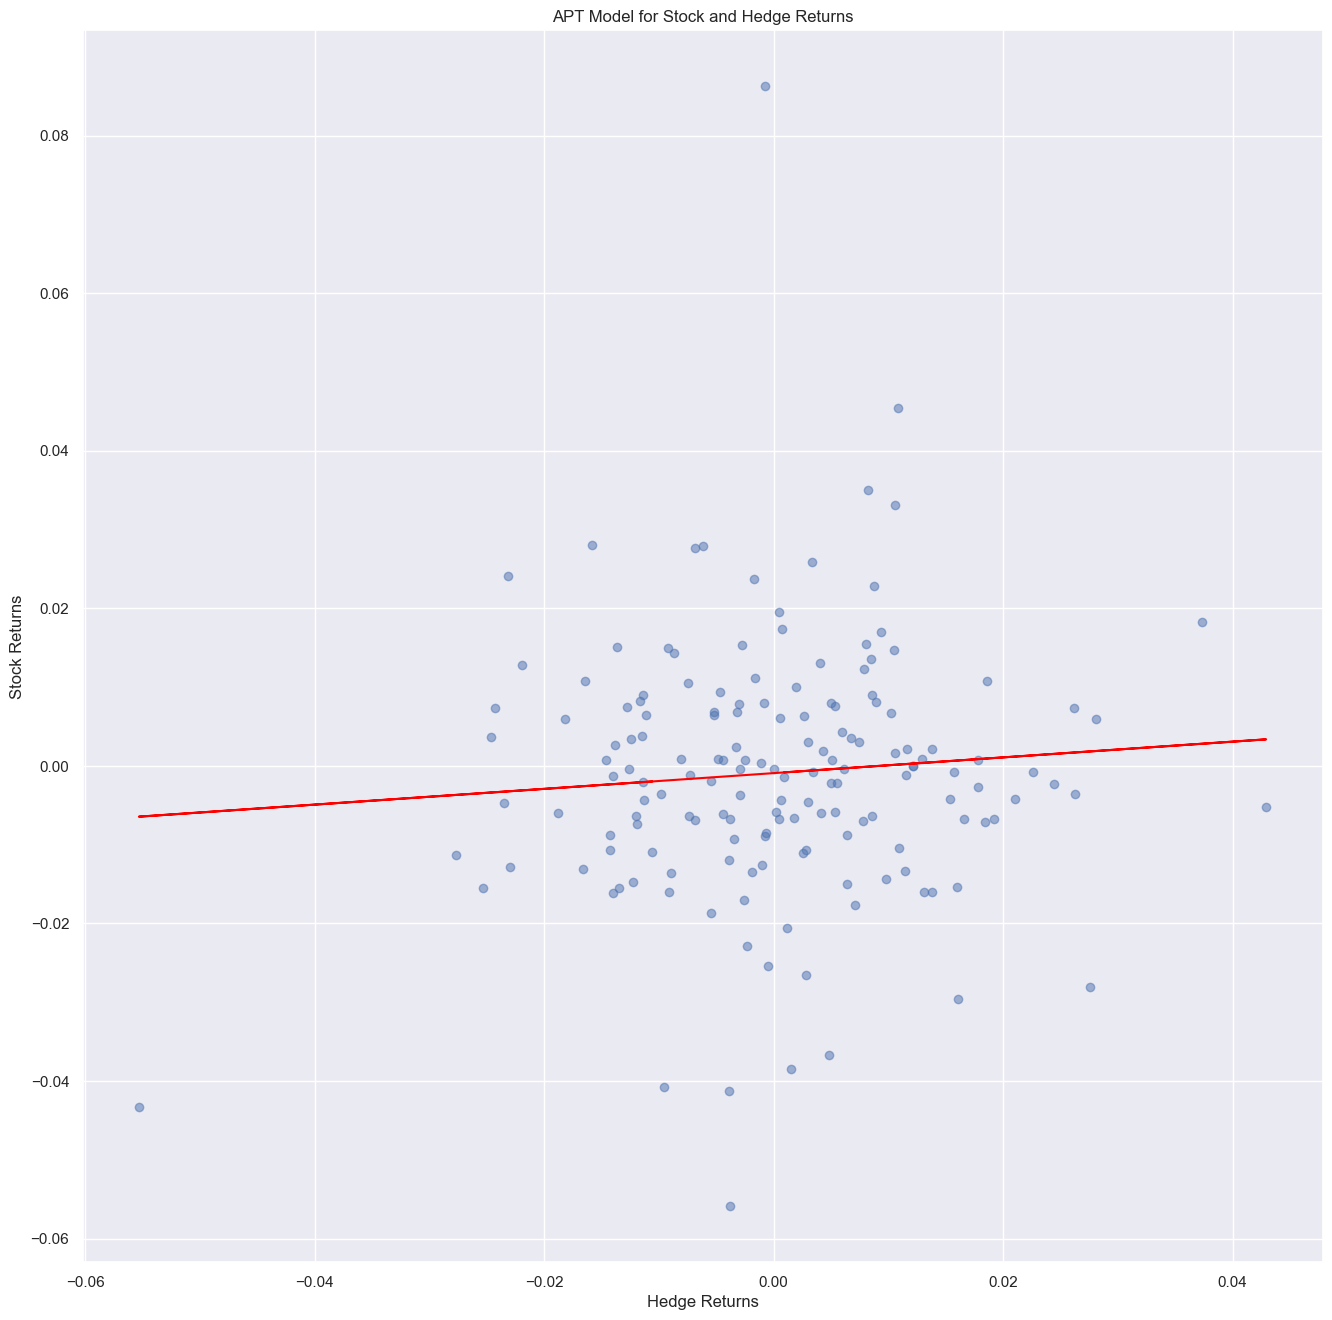

beta1: -0.0009
beta2: 0.0999


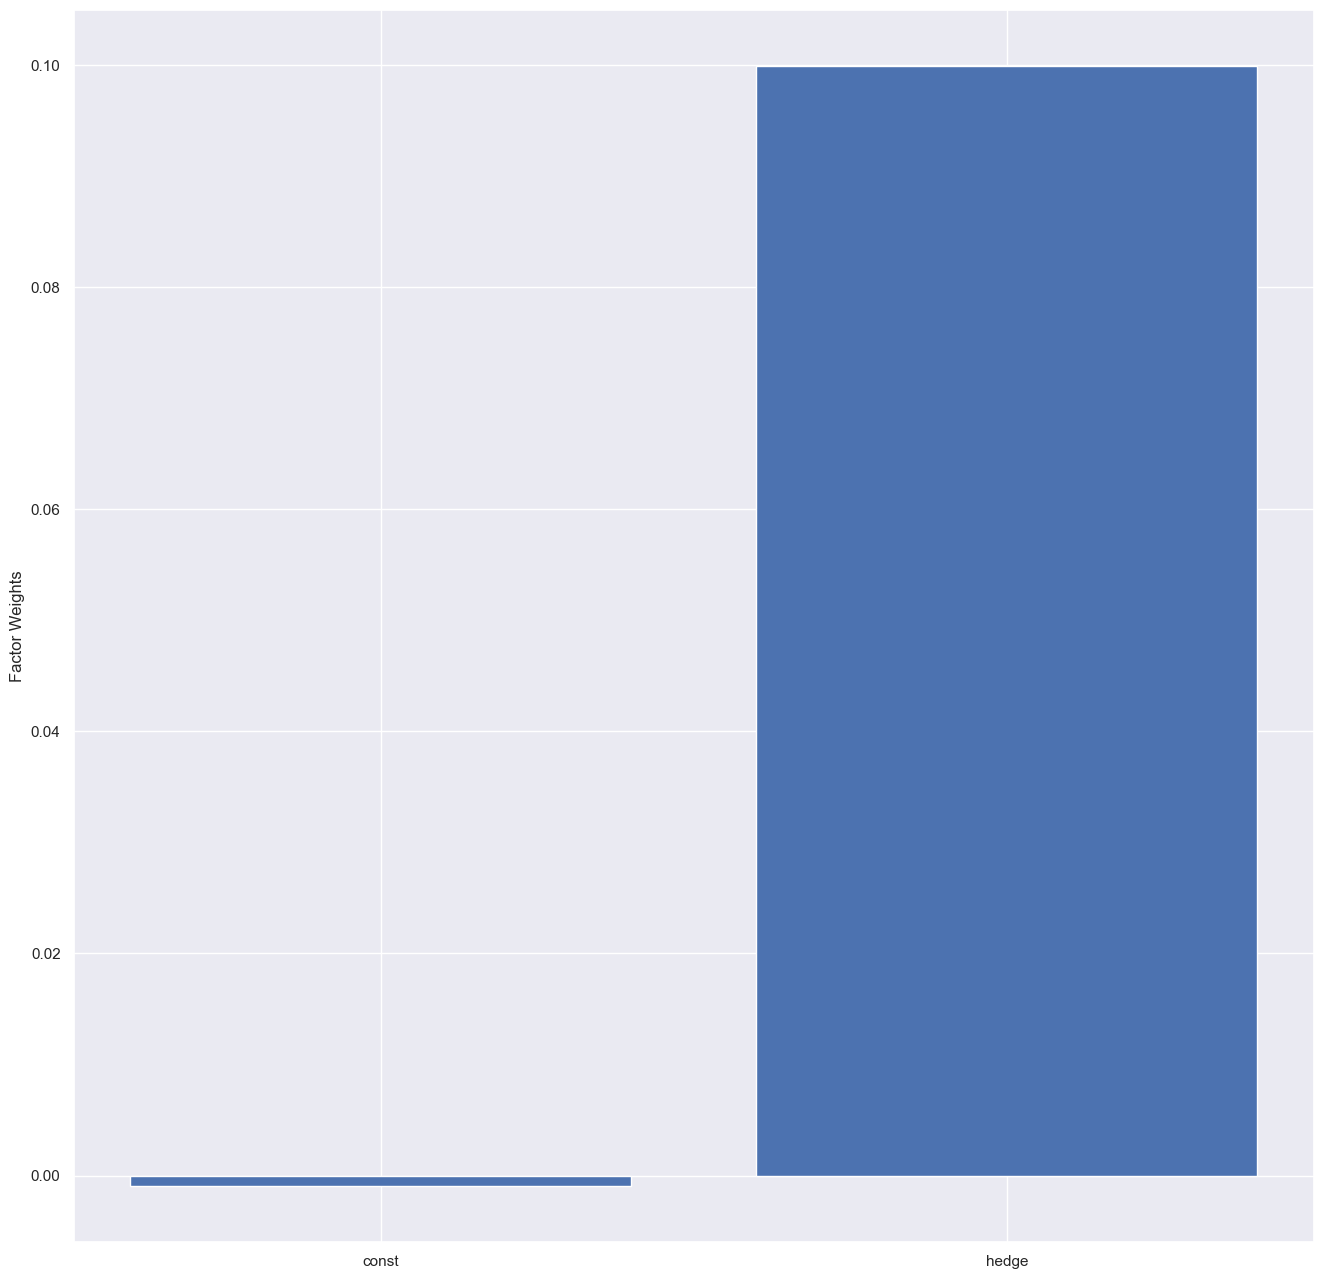

In [17]:
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

stock_df = ak.stock_zh_a_daily(symbol='sh600000')
hedge_df = ak.futures_zh_daily_sina(symbol='IC2103')
# 提取股票收盘价和对冲资产收盘价
stock_price = stock_df['close']
hedge_price = hedge_df['close']

# 计算收益率
stock_return = stock_price.pct_change().dropna()
hedge_return = hedge_price.pct_change().dropna()

# 合并收益率数据
data = pd.concat([stock_return, hedge_return], axis=1)
data.columns = ['stock', 'hedge']
data = data.dropna()
# 拟合线性回归模型
X = sm.add_constant(data['hedge'])
model = sm.OLS(data['stock'], X).fit()

# 输出模型结果
print(model.summary())

# 绘制散点图和回归线
plt.scatter(data['hedge'], data['stock'], alpha=0.5)
plt.plot(data['hedge'], model.predict(X), color='red')
# 横轴表示对冲资产收益率，纵轴表示股票收益率。散点图上的每个点表示一组样本数据，回归线表示线性回归模型的拟合结果。
# 添加标题和标签
plt.title('APT Model for Stock and Hedge Returns')
plt.xlabel('Hedge Returns')
plt.ylabel('Stock Returns')

# 显示图像
plt.show()

# 提取因子权重和敏感度
coeffs = model.params
beta1 = coeffs[0]
beta2 = coeffs[1]
print("beta1: {:.4f}".format(beta1))
print("beta2: {:.4f}".format(beta2))

# 作图
fig, ax = plt.subplots()
ax.bar(["const", "hedge"], [beta1, beta2])
ax.set_ylabel("Factor Weights")
plt.show()

根据APT的公式，可以用该模型的参数估计来计算中国平安股票的预期收益率，假设无风险利率为$R_f=0.03$，得到：

$E(R_{sh600000}) = R_f + \beta_{sh600000,IC2103}f_{IC2103}$

其中，$\beta_{sh600000,IC2103}$是回归模型的斜率参数，表示股票收益率对对冲资产收益率的敏感度，$f_{IC2103}$是对冲资产IC2103的因子收益率。可以使用预测的对冲资产IC2103的收益率来估计其因子收益率。

In [18]:
# 计算预期收益率
Rf = 0.03
E_R_stock = Rf + beta2 * hedge_return.mean()
print("E(R_stock): {:.4f}".format(E_R_stock))

E(R_stock): 0.0300


## 2.2 APT模型的重点
1. 一个因子描述了众多资产共同暴露的某种系统性风险，该风险是资产收益率背后的驱动力，因子收益是这种系统性风险的风险补偿和风险溢价
2. Law of Parsimony (简约法则)：因子越少，模型越简单，模型的解释性越强，因子的解释性越强

## 2.3 因子暴露矩阵
因子暴露矩阵就是一个 $n\times k$ 的矩阵，其中 $n$ 表示股票数量，$k$ 表示因子数量，矩阵中的元素 $\beta_{i,j}$ 表示第 $i$ 只股票对第 $j$ 个因子的因子暴露系数。该矩阵的意义在于，可以通过矩阵的每一列来观察每个因子对股票收益率的影响程度，进而进行因子选择和组合优化等策略构建。
过程如下：

首先，计算因子收益率矩阵，这可以通过对历史价格数据进行主成分分析（PCA）来获得。

接下来，需要估计因子收益率和资产收益率之间的回归系数，这可以通过进行多元回归来获得。回归方程的形式如下：

$$Asset Returns = alpha + beta1 * Factor 1 Returns + beta2 * Factor 2 Returns + ... + epsilon$$

其中，alpha是回归截距，beta1、beta2等是回归系数，epsilon是误差项。

通过估计的回归系数，可以计算出每个资产对每个因子的暴露。具体而言，每个资产对第i个因子的暴露等于该资产在回归方程中对应的beta系数。

然后，可以通过将每个资产对每个因子的暴露乘以相应因子的方差来计算出每个资产对其他资产的协方差贡献。

最后，将每个资产对其他资产的协方差贡献相加，就可以得到资产协方差矩阵。

> 1. https://zhuanlan.zhihu.com/p/77151308



     index_code   con_code trade_date  weight
0     000016.SH  603288.SH   20230228   1.647
1     000016.SH  688599.SH   20230228   0.965
2     000016.SH  601633.SH   20230228   0.614
3     000016.SH  600276.SH   20230228   2.801
4     000016.SH  600031.SH   20230228   1.606
...         ...        ...        ...     ...
1895  000016.SH  600030.SH   20200123   3.281
1896  000016.SH  600028.SH   20200123   1.153
1897  000016.SH  600016.SH   20200123   2.632
1898  000016.SH  600009.SH   20200123   1.159
1899  000016.SH  600000.SH   20200123   2.324

[1900 rows x 4 columns]
上证50成分股 ['603288.SH', '688599.SH', '601633.SH', '600276.SH', '600031.SH', '600104.SH', '600519.SH', '600406.SH', '600893.SH', '600196.SH', '601601.SH', '600436.SH', '601628.SH', '601888.SH', '600745.SH', '600309.SH', '601899.SH', '600036.SH', '603259.SH', '600585.SH', '600028.SH', '601088.SH', '601066.SH', '601995.SH', '600048.SH', '601398.SH', '603986.SH', '600346.SH', '600690.SH', '600900.SH', '601919.SH', '600438.SH'

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.000000e+00,2.802032e-15,-1.382635e-15,2.530387e-16,5.697615e-16,1.120314e-16,-3.056513e-16,5.281287e-16,-5.526030e-16,1.717674e-15,-2.368035e-16,-1.062046e-15,2.305720e-16,-1.671064e-16,1.317064e-15,6.331048e-15
1,2.802032e-15,1.000000e+00,-5.196310e-16,-2.762072e-16,-9.087057e-16,-4.168405e-16,-5.486067e-16,2.991828e-16,-4.350469e-15,3.387354e-15,7.859171e-16,2.509838e-15,-2.205294e-16,-4.153408e-15,3.450433e-15,-7.200988e-15
2,-1.382635e-15,-5.196310e-16,1.000000e+00,-3.700923e-16,1.678329e-16,-4.431996e-16,-4.581278e-16,9.454972e-16,1.540922e-15,9.608617e-16,-7.031409e-16,-1.462866e-15,-3.844930e-16,-1.270464e-15,9.387116e-16,-1.562605e-14
3,2.530387e-16,-2.762072e-16,-3.700923e-16,1.000000e+00,1.315800e-15,-7.516492e-16,-3.809710e-16,-3.328310e-16,7.216843e-16,-1.570573e-15,-3.650445e-16,1.503688e-15,1.699386e-16,4.983585e-15,-2.168484e-15,2.415137e-16
4,5.697615e-16,-9.087057e-16,1.678329e-16,1.315800e-15,1.000000e+00,1.150442e-15,9.691587e-16,-2.890327e-16,-1.491768e-15,1.146973e-15,3.587780e-16,-5.147085e-16,-4.835190e-16,-4.918857e-16,8.355372e-16,1.235264e-14
5,1.120314e-16,-4.168405e-16,-4.431996e-16,-7.516492e-16,1.150442e-15,1.000000e+00,1.463203e-15,-7.766494e-16,5.622527e-16,-2.341341e-15,-5.188426e-16,1.332075e-15,-1.007534e-15,1.722901e-16,1.588453e-15,2.476782e-15
6,-3.056513e-16,-5.486067e-16,-4.581278e-16,-3.809710e-16,9.691587e-16,1.463203e-15,1.000000e+00,1.128159e-17,-4.082808e-16,-3.365434e-16,-1.815994e-16,2.473984e-15,1.068098e-15,1.828165e-16,9.628248e-17,-2.523138e-15
7,5.281287e-16,2.991828e-16,9.454972e-16,-3.328310e-16,-2.890327e-16,-7.766494e-16,1.128159e-17,1.000000e+00,1.374815e-16,1.884223e-16,3.382974e-16,-7.497759e-19,-2.927218e-16,8.852172e-16,-1.017501e-18,1.179391e-15
8,-5.526030e-16,-4.350469e-15,1.540922e-15,7.216843e-16,-1.491768e-15,5.622527e-16,-4.082808e-16,1.374815e-16,1.000000e+00,7.785564e-16,3.423140e-16,1.025403e-15,-7.869212e-17,-2.184950e-15,5.628939e-16,2.416770e-16
9,1.717674e-15,3.387354e-15,9.608617e-16,-1.570573e-15,1.146973e-15,-2.341341e-15,-3.365434e-16,1.884223e-16,7.785564e-16,1.000000e+00,-9.880430e-16,-1.401990e-15,-7.533791e-16,1.272414e-15,-1.216341e-15,1.496344e-15


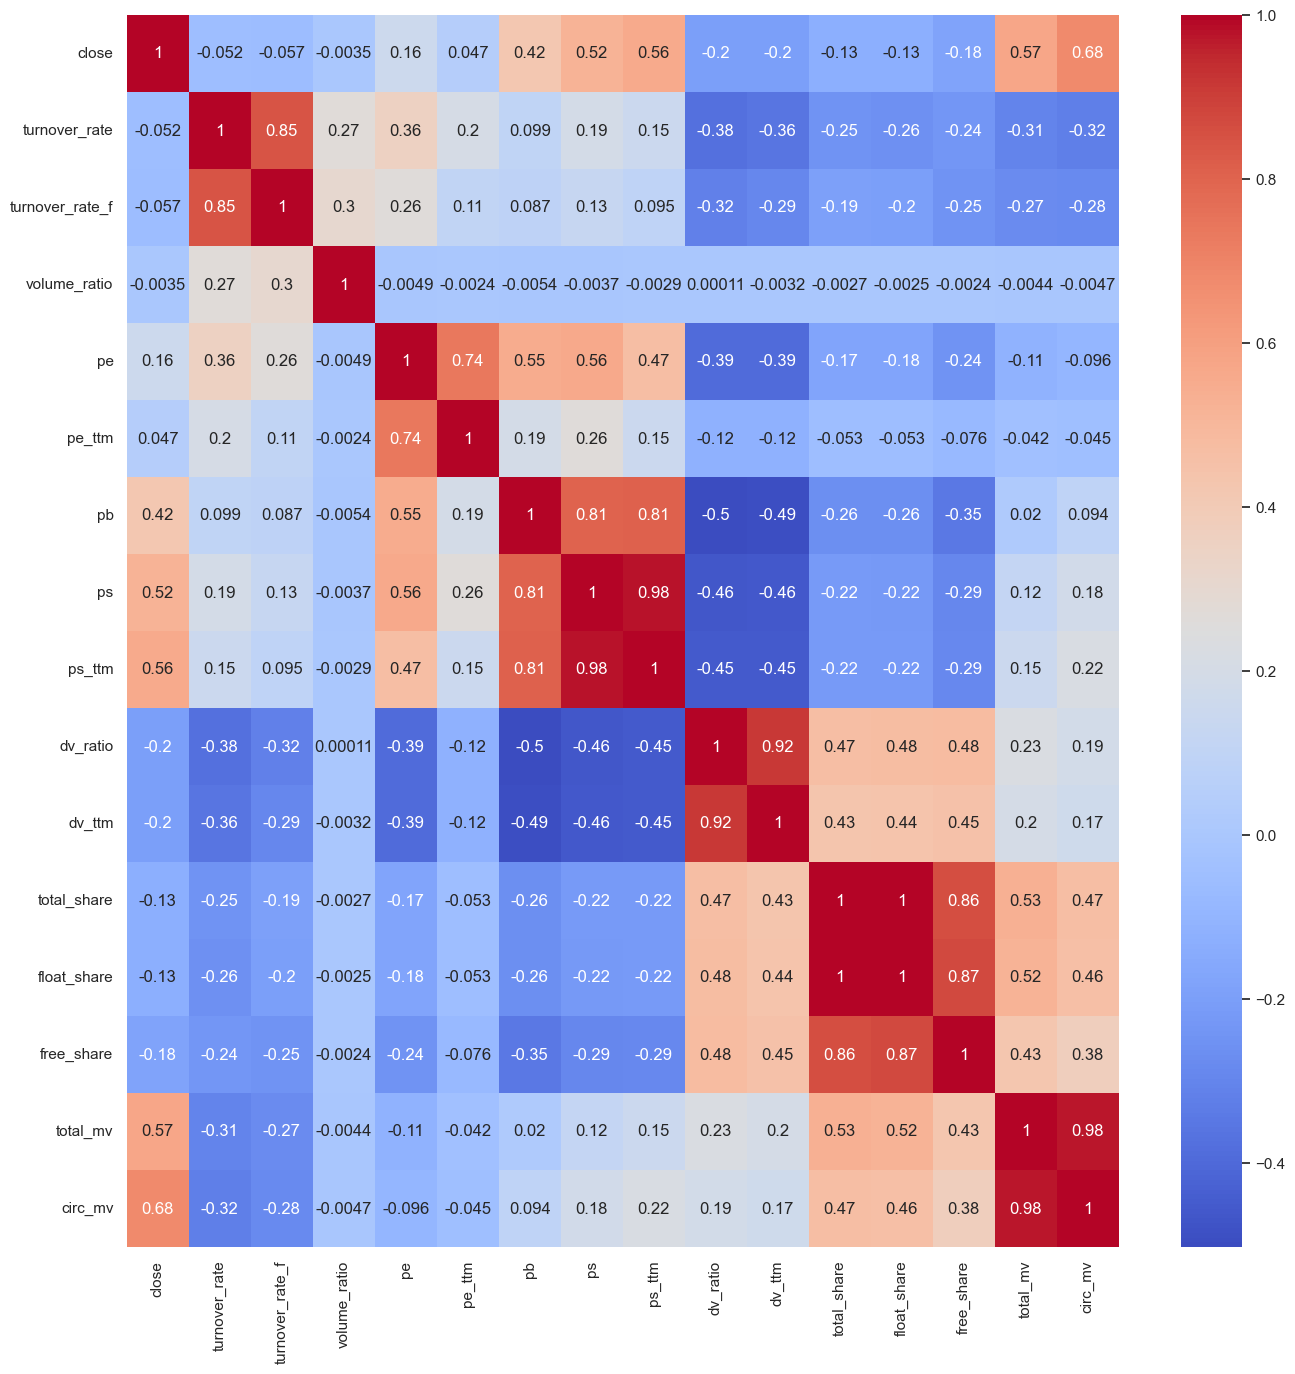

In [19]:
from os.path import exists
from tqdm import tqdm
import tushare as ts
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set(rc={'figure.figsize': (16, 16)})

ts = ts.pro_api('')
# Get constituents of the SSE 50 index
index_code = "000016.SH"
start_date = "20200101"
end_date = "20230301"
df_index = ts.index_weight(index_code=index_code, start_date=start_date, end_date=end_date)
print(df_index)
# 由于上证50指数的成分股每年会有变动，因此需要筛选出2023年3月1日的成分股
df_index = df_index[df_index['trade_date'] == '20230228']
stock_codes = df_index["con_code"].tolist()
print("上证50成分股", stock_codes)

# Get daily closing prices of SSE 50 index
index_close = ts.index_daily(ts_code=index_code, start=start_date, end=end_date)
index_close = index_close["close"]
df=pd.DataFrame()
if exists('./data/stock_factors.csv'):
    df_factors = pd.read_csv('./data/stock_factors.csv')
    df = df_factors
else:
    # Get daily stock prices and factor data of SSE 50 constituents
    df_factors = pd.DataFrame()
    for code in tqdm(stock_codes):
        factors = ts.daily_basic(ts_code=code, start_date=start_date, end_date=end_date)
        df_factors = pd.concat([df_factors, factors])
    df = df_factors
    # Remove missing values
    df.dropna(inplace=True)
    df.to_csv('./data/stock_factors.csv', index=False)

df.set_index(['ts_code', 'trade_date'], inplace=True)
# 数据进行标准化处理
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
# 使用PCA进行主成分分析
pca = PCA()
pca.fit(df_scaled)
# 查看每个主成分的方差贡献率
print(pca.explained_variance_ratio_)
# seaborn绘制相关矩阵图
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
# 使用PCA转换数据到主成分空间
df_pca = pca.transform(df_scaled)
# 计算主成分之间的协方差矩阵
pd.DataFrame(df_pca).corr()

# 三、其他学说
1. CCAPM
2. 噪音交易者
3. 核心问题：1. 哪些是独立的因子？ 2. 哪些因子是重要的？ 3. 因子取得资产价格的原因是什么？
4. 因子显著性 t-statistic 阈值到3.4
5. 因子收益率随曝光后降低：资金拥挤+流动性冲击
6. 风格因子：Smart Beta ETFs